<a href="https://colab.research.google.com/github/martinmaturana777/AED-Apuntes/blob/main/N_copias_de_Resumen_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESUMEN ALGORITMOS C2 SKEREEEEEEEEEEEEEEEEEE


In [ ]:
!pip install aed-utilities

import aed_utilities as aed

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.8 MB/s eta 0:00:00
  Created wheel for aed-utilities: filename=aed_utilities-0.5.6-py3-none-any.whl size=4541 sha256=21672ed54b492aff3d2f97d49e301e5504c93a00caa152f8f0bb63be4980b863
  Stored in directory: /root/.cache/pip/wheels/e2/87/f8/223d5e6792e7b0fc909ef2cdb96ceb6a5336f428bc8eea7ffa
Successfully built aed-utilities


Ejercicio 5.1
En este ejercicio se trata chequear si una secuencia de paréntesis está bien
escrita. Si hay solo un tipo de paréntesis, por ejemplo ( y ), una secuencia correcta sería (()(())) y una incorrecta seria (()))()( o ()). Ésta sería una tarea fácil de responder, pues bastaría con llevar un contador de paréntesis abiertos, que se incrementa cuando se encuentra un ( y se decrementa cuando se encuentra un ) y se va chequeando que este contador nunca sea negativo y cuando se termine la secuencia el contador quede en 0.

## **PILAS Y COLAS**


In [ ]:
def chequeo2(s, a, b):
    #primero creamos una pila vacia
    pila = Pila()

    #luego para corroborar los parentesis se hara uso de un diccionario, de manera que
    #cuando recibe un parentesis cerrado, nos devuelva un abierto
    #logrando hacer una relacion entre ambos
    diccionario_parentesis = {}

    for i in range(len(a)):
      diccionario_parentesis[b[i]] = a[i] #los de cierre se les relaciona el de apertura correspondiente

    #con el diccionario ya creado recorremos s
    for letra in s:
      #caso donde es de apertura:
      if letra in a:#si s pertenece a algun parentesis de a
        pila.push(letra) #empujamos la letra a la pila como dice indicacion

      elif letra in diccionario_parentesis:#si la letra es de cierre, solo que lo vemos con diccionario para relacionarlo
        #caso donde pila vacia
        if pila.is_empty():
          return False

        ultimo_parentesis = pila.pop() #sacamos el ultimo parentesis en la pila
        if ultimo_parentesis != diccionario_parentesis[letra]:#con el diccionario vemos el abierto del cerrado, entonces
         #si no coinciden es falso, puesto que estamos haciendo ( = (
            return False

      else: #cuando no es un parentesis o no es valido
        return False

    return pila.is_empty()

Ejercicio 5.2
Agregar a la clase Heap un método modificar(k,x) que al ser invocado, cambie la prioridad del elemento del casillero k, dándole como nuevo valor x y asegurando que el heap siga cumpliendo las restricciones de orden. Esta operación debe funcionar en tiempo  O(logn)  en el peor caso. Escriba a continuación la definición del método modificar(k,x), y pruébela con las instrucciones que aparecen en el casillero siguiente.

In [ ]:
import numpy as np
def trepar(a,j): # El elemento a[j] trepa hasta su nivel de prioridad, a el array, j el elemento por subir
    while j>=1 and a[j]>a[(j-1)//2]:
        (a[j],a[(j-1)//2])=(a[(j-1)//2],a[j]) # intercambiamos con el padre
        j=(j-1)//2 # subimos al lugar del padre

def hundir(a,j,n): # El elemento a[j] se hunde hasta su nivel de prioridad, a el array, j el elemento por hundir, n cantidad actual de elementos en el heap.
    while 2*j+1<n: # mientras tenga al menos 1 hijo
        k=2*j+1 # el hijo izquierdo
        if k+1<n and a[k+1]>a[k]: # el hijo derecho existe y es mayor
            k+=1
        if a[j]>=a[k]: # tiene mejor prioridad que ambos hijos
            break
        (a[j],a[k])=(a[k],a[j]) # se intercambia con el mayor de los hijos
        j=k # bajamos al lugar del mayor de los hijos

class Heap:
    def __init__(self,maxn=100):
        self.a=np.zeros(maxn)
        self.n=0
    def insert(self,x):
        assert self.n<len(self.a)
        self.a[self.n]=x
        trepar(self.a,self.n)
        self.n+=1
    def extract_max(self):
        assert self.n>0
        x=self.a[0] # esta variable lleva el máximo, el casillero 0 queda vacante
        self.n-=1   # achicamos el heap
        self.a[0]=self.a[self.n] # movemos el elemento sobrante hacia el casillero vacante
        hundir(self.a,0,self.n)
        return x

    def modificar(self, k, x): #Implementar esta función
        #cambie la prioridad del elemento del casillero k, dándole como nuevo valor x y asegurando que el heap siga cumpliendo las restricciones de orden

        #primero debemos buscar nuestro casillero k y asignarle el valor x
        #notamos que k nos dice la posicion del casillero, esto es:
        casillero_k = self.a[k]
        self.a[k] = x
        #luego con las funciones que tenemos vamos viendo si trepamos o hundimos
        if x > casillero_k: #si el valor insertado es mayor al que estaba
          trepar(self.a, k)
        elif x < casillero_k:
          hundir(self.a, k, self.n)

    def imprimir(self):
        print(self.a[0:self.n])

In [ ]:
a=Heap(20)
a.insert(55)
a.insert(50)
a.insert(70)
a.insert(12)
a.insert(36)
a.insert(10)
a.insert(21)
a.insert(24)
a.insert(20)
a.insert(62)
a.imprimir()
a.modificar(4,65)
a.imprimir()
a.modificar(3,15)
a.imprimir()

[70. 62. 55. 24. 50. 10. 21. 12. 20. 36.]
[70. 65. 55. 24. 62. 10. 21. 12. 20. 36.]
[70. 65. 55. 20. 62. 10. 21. 12. 15. 36.]


### khops (USA BFS)

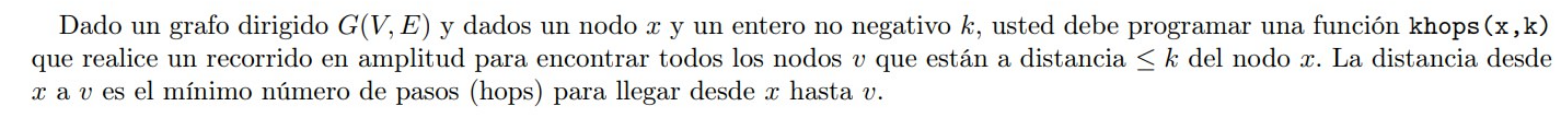

In [ ]:
class NodoDirigido:
    def __init__(self, info):
        self.info = info
        self.aristas = []

    def arista(self, nodo):
        if nodo not in self.aristas:
            self.aristas.append(nodo)

    def get_aristas(self):
        return self.aristas

def khops(x, k):
    visitados = []
    resultado = []

    # Cola de BFS implementada como lista de tuplas (nodo, distancia)
    cola = [(x, 0)]

    while len(cola) > 0:
        actual, distancia = cola.pop(0)  # simula .popleft()

        if actual in visitados:
            continue

        visitados.append(actual)

        if distancia <= k:
            resultado.append(actual)

            for vecino in actual.get_aristas():
                cola.append((vecino, distancia + 1))

    return resultado

## **DICCIONARIOS**


### Ejercicio 6.1 (Agregar método ``min`` a un ABB)

El objetivo de este ejercicio es que usted agregue un método ``min`` a un árbol de búsqueda binaria. Este método debe entregar un puntero al nodo interno que contiene el elemento mínimo en un ABB. Para simplificar, usted puede suponer que el árbol siempre contiene al menos una llave.

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

class Nodoe:
    def __init__(self):
        pass

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz

    def min(self):
        #primero el caso base, que es cuando puntero.sig es Nodoe
        #ojo hay que hacer p = self.raiz o estaremos modificando self.raiz
        p = self.raiz
        while p != Nodoe: #iteramos mientras no sea None, asi comprobamos si es arbol vacio
          if isinstance(p.izq, Nodoe): #sig es None
            return p #es nuestro minimo, pues ABB el min estara a la izq del todo
          #avanzamos el puntero
          p = p.izq


    def insert(self,x):
        if isinstance(self.raiz, Nodoe):
            self.raiz=Nodoi(Nodoe(),x,Nodoe())
            return
        p=self.raiz
        while True:
            assert x!=p.info
            if x<p.info:
                if isinstance(p.izq, Nodoe):
                    p.izq=Nodoi(Nodoe(),x,Nodoe())
                    return
                p=p.izq
            else: # x>p.info
                if isinstance(p.der, Nodoe):
                    p.der=Nodoi(Nodoe(),x,Nodoe())
                    return
                p=p.der

    def search(self,x):
        p=self.raiz
        while not isinstance(p, Nodoe):
            if x==p.info:
                return p
            p=p.izq if x<p.info else p.der
        return None

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe, drawNull=True)
      btd.draw_tree(self, "raiz")

### Ejercicio 6.2 (Chequear si un árbol es AVL en tiempo lineal)

En este ejercicio usted debe modificar la implementación dada para asegurar que cada nodo del árbol se visite solo una vez, asegurando de esta manera que el costo de determinar si un árbol es AVL sea $\Theta(n)$.

Para esto, usted debe fusionar las funciones ``altura`` y ``es_AVL``en una sola función ``altura_AVL``, que retorne una tupla $(h,a)$, donde $h$ es la altura y $a$ es un booleano que dice si el árbol es AVL. De esta manera, al invocar la función se tiene de una sola vez toda la información necesaria.

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

    def altura(self):
        return 1+max(self.izq.altura(),self.der.altura())

    def es_AVL(self):
        return abs(self.izq.altura()-self.der.altura())<=1 \
                and self.izq.es_AVL() and self.der.es_AVL()

    def __str__(self):
        return "("+self.izq.__str__()+str(self.info)+self.der.__str__()+")"

class Nodoe:
    def __init__(self):
        pass

    def altura(self):
        return 0

    def es_AVL(self):
        return True

    def __str__(self):
        return"☐"

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz

    def es_AVL(self):
        return self.raiz.es_AVL()

    def __str__(self):
        return self.raiz.__str__()

    def altura_AVL(self):
      #para tener complejidad O(n) es que cada nodo se visite una vez
      #entonces debemos ir nodo por nodo viendo la tupla h y a

      h_izq, a_izq = self.izq.altura_AVL() #Miramos nuestra altura izq y si es avl
      h_der, a_der = self.der.altura_AVL() #Lo mismo para la derecha

      #ahora analizamos nuestra altura actual
      h_actual = 1 + max(h_izq, h_der) #ojo que la altura parte desde el nodo que esta mas abajo !!!, por eso max
      #tambien revisamos que se cumple la condicion de es AVL, es decir, que la resta de las alturas
      #en los hijos de los nodos sea <= 1
      condicion = abs(h_izq - h_der) <= 1
      #ahora con la condicion comprobamos si se cumple para el nodo Y sus hijes
      a_actual = condicion and a_izq and a_der #es un bool con condicion actual y luego la de los hijes
      return (h_actual, a_actual)




In [ ]:
a1=Arbol(Nodoi(Nodoi(Nodoe(),1,Nodoe()),
            2,
            Nodoi(Nodoe(),3,Nodoi(Nodoe(),4,Nodoe()))))
print(a1)
print(a1.es_AVL())

((☐1☐)2(☐3(☐4☐)))
True


In [ ]:
a2=Arbol(Nodoi(Nodoi(Nodoe(),1,Nodoe()),
            2,
            Nodoi(Nodoe(),3,Nodoi(Nodoe(),4,Nodoi(Nodoe(),5,Nodoe())))))
print(a2)
print(a2.es_AVL())

((☐1☐)2(☐3(☐4(☐5☐))))
False


### Ejercicio 6.3 (Número de operaciones *split*)

Supongamos que comenzamos con un árbol 2-3 vacío y a continuación insertamos $n$ llaves. El objetivo de este ejercicio es calcular cuántas operaciones *split* se pueden llegar a ejecutar a lo largo de este proceso, en el peor caso.

Una manera de acotar este número de operaciones es ver que una inserción puede gatillar la ejecución de $O(\log{n})$ operaciones *split*, y como son $n$ inserciones, el número total de operaciones *split* es $O(n\log{n})$.

Lo anterior es una cota superior, pero en realidad está muy sobredimensionada.

Demuestre que el número total de operaciones *split* ejecutadas al insertar $n$ llaves comenzando con un árbol 2-3 vacío es $O(n)$ en el peor caso. Escriba su demostración en el siguiente recuadro.

*Indicación*: Considere el impacto de un *split* sobre el número de nodos del árbol.

Relación entre splits y creación de nodos:
Cada operación split crea exactamente un nuevo nodo en el árbol. Esto se debe a que cuando un nodo con 3 claves se divide:

Se transforma en dos nodos (uno existente que se actualiza y otro nuevo).

La clave media se inserta en el nodo padre (sin crear un nodo adicional en este paso).

Cota inferior para el número de nodos:
Un árbol 2-3 con
n
n claves debe tener al menos
⌈
n
/
2
⌉
⌈n/2⌉ nodos, ya que cada nodo puede contener como máximo 2 claves.

Cota superior para el número de nodos:
Como cada nodo contiene al menos 1 clave, el número total de nodos
N
N es a lo sumo
n
n:

N
≤
n
.
N≤n.


Relación con los splits:
Sea
S
S el número total de splits realizados. Cada split aumenta el número total de nodos en 1. Inicialmente (árbol vacío),
N
=
0
N=0. Tras insertar
n
n claves y realizar
S
S splits:

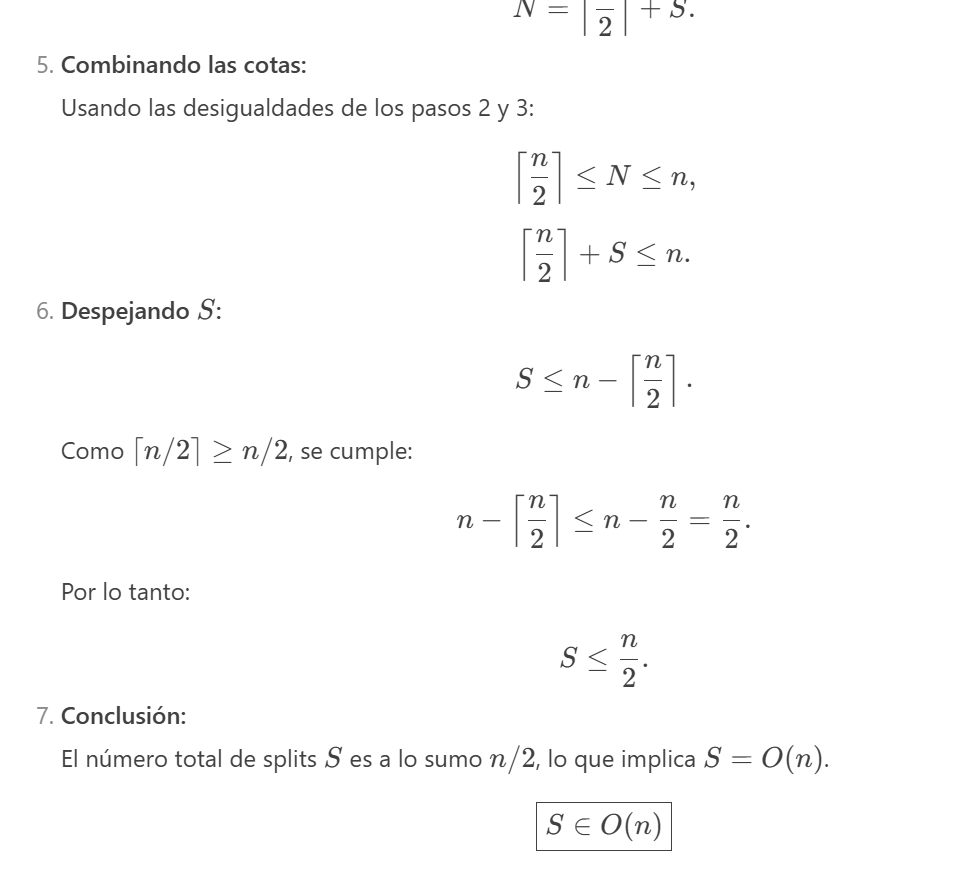


### Ejercicio 6.4 : Búsqueda en árboles 2-3

El objetivo de esta tarea es que usted implemente la búsqueda ("search") en árboles 2-3 (sólo la búsqueda, no la inserción).
Para ello complete el código que implementa la función ``search`` en tres tipos de nodos:``Nodo2``, que almacena un nodo que tiene 2 hijos, ``Nodo3``, que tiene 3 y ``Nodoe`` que implementa un nodo externo. Además, la función ``search`` de la clase ``Arbol23`` está dada en el enunciado. En todos los casos, la función debe retornar un puntero al nodo que contiene la llave buscada en caso de ser exitosa, o ``None`` si es infructuosa. Usted puede decidir si usa un enfoque recursivo o no para implementarlo.

En varias partes se ha rellenado con código provisorio, para que compile. Usted debe reemplazar y completar todo lo que sea necesario para que todo funcione.

Para inspirarse puede ver operación de búsqueda ``search`` en un árbol binario en https://colab.research.google.com/github/ivansipiran/AED-Apuntes/blob/main/06_Diccionarios.ipynb#scrollTo=KTlzPSiLGRgy

In [ ]:
class Nodo2:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

    def string(self):
      return "Nodo2("+str(self.info)+")"

    #Implementa esta función
    def search(self,x):
        #esta es la misma que ABB
        if x ==self.info:
          return self
        if x<self.info:
          return self.izq.search(x)
        else:
          return self.der.search(x)

class Nodo3:
    def __init__(self, izq, info1, med, info2, der):
        self.izq=izq
        self.info1=info1
        self.med=med
        self.info2=info2
        self.der=der

    def string(self):
      return "Nodo3("+str(self.info1)+","+str(self.info2)+")"

    #Implementa esta función
    def search(self,x):
        #ahora tenemos 3 hijos con un nodo padre (p1,p2) tq
        #h1 < p1 < h2 < p2 < h3
        #para ello tendremos info1, que es el primer arbol
        #info2 el segundo
        if x == self.info1 or x == self.info2: #lo encontramos
          return self

        if x < self.info1:#caso p1 por izq, es decir, izq
          return self.izq.search(x)
        elif self.info1 < x < self.info2:#caso p2 por izq, es dcir, el mid
          return self.med.search(x)
        elif self.info2 < x: #solo nos queda la derecha
          return self.der.search(x)


class Nodoe:
    def __init__(self):
        pass

    #Implementa esta función
    def search(self,x):
      #pues nodoe es none
        return None

    def __str__(self):
      return "☐"

class Arbol23:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz

    def search(self,x):
        return self.raiz.search(x)

### Ejercicio 6.5 (Inserciones en una tabla de hashing con Linear Probing)

Suponga que se tiene una tabla de hashing con Linear Probing, de tamaño 10, inicialmente vacía, con la función de hashing $h(x) = x \bmod 10$ (por ejemplo, $h(64)=4$). Muestre en la siguiente tabla el resultado de insertar (a mano) la siguiente secuencia de llaves:

```
34, 59, 45, 27, 14, 22, 75, 25
```

In [ ]:
def chequea_tabla(lista):
    h=0
    for x in lista:
        h = (h*100+x) % 100000007
    print("OK" if h==60375958 else "Error")

In [ ]:
chequea_tabla([25, 0, 22, 0, 34, 45, 14, 27, 75, 59])

OK


### Ejercicio 6.6 (Operaciones en un *trie*)

Consideremos el conjunto de llaves que aparece en el apunte

```
A = 00100
B = 01000
C = 01111
D = 11000
E = 11101
```

con las cuales se construye este *trie*:

![trie](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/trie.png?raw=1)

A continuación ejecute (a mano) cada una de las operaciones que se indican, operando siempre sobre el árbol original, y dibuje en cada caso el árbol resultante:

1. Inserte ``F = 10110``

2. Inserte ``G = 00110``

3. Elimine ``E = 11101``

## **ORDENAMIENTO**

In [ ]:
import random
def quicksort3(a):
  qsort(a,0,len(a)-1)

#Esta es la versión del apunte que deberá modificar
def qsort(a,i,j): # ordena a[i],...,a[j]
    #Añadir casos de borde

    # caso donde no hay elementos:
  if (j-i) < 0:
    return

    # caso donde hay 1 elemento (i con j en mismo lugar, 1 elemento)
  elif (j-i) == 0:
    return

    #caso donde hay 2 elementos, hay que hacer swap
  elif (j-i) == 1: # hay 2 de i a j
    if a[j] < a[i]: #vemos cual es mayor y cambiamos:
        a[i], a[j] = a[j], a[i]
      #sino no nos importa ya que estaria ordenado
    return

  else:
    k=particionMedianaDe3(a,i,j)
    qsort(a,i,k-1)
    qsort(a,k+1,j)

#Implementar esta función de acuerdo al enunciado
def particionMedianaDe3(a,i,j): # particiona a[i],...,a[j], retorna posición del pivote
  #posiciones randoms del array
  pos = random.sample(range(i, j + 1), 3) #OJO QUE RANDOM SAMPLE NO REPITE LOS NUMEROS RANDOMS !!!
  #luego obtenemos los valores
  valores = [(a[p], p) for p in pos]
  valores.sort() #ordenados, una lata ocupar min med y max
  #ahora definimos min, med y max como (valor, posicion)
  min_val, min_pos = valores[0]
  med_val, med_pos = valores[1]
  max_val, max_pos = valores[2]
  #ponemos las posiciones como indicado, hay que intercambiarlas !!!
  #OJO ACA, debemos tener cuidado en la posicion en la que esten y NO sobreescribirlos

  #caso 1: movemos el minimo a la posicion i, esto nos deja para intercambiar o med o max
  if min_pos != i: #si el minimo no esta en la posicion i(primera)
    a[i], a[min_pos] = a[min_pos], a[i] #intercambiamos i con minimo
    if med_pos == i:#si el medio esta en i
        med_pos = min_pos #la posicion de med sera min
    if max_pos == i:#si max esta en i, sera min
        max_pos = min_pos

  #caso 2: movemos el medio a la posicion i + 1, esto nos deja para intercambiar max (min ya paso)
  if med_pos != i + 1:
    a[i + 1], a[med_pos] = a[med_pos], a[i + 1]
    if max_pos == i + 1:
        max_pos = med_pos

  # caso 3: movemos el maximo a la posicion j, como son puros ifs no vemos los otros casos ya que fueron barridos
  if max_pos != j:
      a[j], a[max_pos] = a[max_pos], a[j]

  #ahora debemos recorrer en i+2 j-1 y utilizar pivote med
  p = a[i + 1]
  #definimos s y t como indicado:
  s = i + 2
  t = j - 1

  while s <= t: #ahora movemos las posiciones, mientras inicio no supere a fin
      while s <= t and a[s] <= p: #si inicio menor a fin y su valor menor a pivote
          s += 1 #avanzamos
      while s <= t and a[t] > p: #si inicio menor a fin y su valor mayor a pivote
          t -= 1 #acortamos
      if s < t: #ahora intercambiamos valores
          a[s], a[t] = a[t], a[s]
          #no olvidemos avanzar:
          s += 1
          t -=1

  a[i + 1], a[t] = a[t], a[i + 1]

  return t #ahora esta en el lugar correcto


### Ejercicio 7.1 (Quicksort con mediana de 3)

Modifique el algoritmo Quicksort para que en la fase de partición utilice como pivote a la mediana de 3 elementos elegidos al azar.

Para esto, se recomienda modificar el algoritmo de partición de modo que seleccione 3 elementos al azar en el rango $i..j$ y los ordene, dejando en $a[i]$ el mínimo de los 3, en $a[i+1]$ la mediana de los 3 y en $a[j]$ el máximo de los 3. Luego, se aplica el algoritmo de partición ya conocido al segmento $a[i+2],\ldots,a[j-1]$, con $a[i+1]$ como pivote. Al terminar, el pivote se mueve al centro y se retorna su posición.

Otro cambio que se debe hacer es tratar los casos de arreglos de tamaño $0$, $1$ y $2$ como casos de borde, y aplicar ``qsort`` recursivo solo a arreglos de tamaño mayor o igual a 3.

En el siguiente recuadro escriba su algoritmo modificado y luego ejecute las instrucciones de prueba del recuadro siguiente.

### Ejercicio 7.2 (Radix Sort)

Ordene el conjunto

```
    73895
    93754
    82149
    99046
    14853
    94171
    54963
    70471
    80564
    66496
```

usando Radix Sort. Muestre el estado del conjunto después cada pasada (una pasada consiste en la separación en grupos de acuerdo a los dígitos presentes en la columna que se está procesando, seguida de la concatenación de los grupos resultantes). Recuerde que las columnas se procesan de derecha a izquierda y que a igualdad de valores, se debe preservar el orden original.

Para entregar su solución y verificar que esté correcta, sustituya los ceros por la información correcta en el siguiente código. Para ayudarle a empezar, se entrega el resultado después de la primera pasada.

In [ ]:
import numpy as np

# Verifica que la lista 'a' esté ordenada después de haber efectuado 'k' pasadas
# Se muestran solo los k dígitos de más a la derecha de cada número
def verifica_orden(k,a):
  b=[x%(10**k) for x in a]
  print(b)
  print("Ordenado" if np.all([b[i]<=b[i+1] for i in range(0,len(b) - 1)]) else "Desordenado")

In [ ]:
verifica_orden(1,[94171,70471,14853,54963,93754,80564,73895,99046,66496,82149])

[1, 1, 3, 3, 4, 4, 5, 6, 6, 9]
Ordenado


In [ ]:
verifica_orden(2,[99046, 82149, 14853, 93754, 54963, 80564, 94171, 70471, 73895, 66496])

[46, 49, 53, 54, 63, 64, 71, 71, 95, 96]
Ordenado


In [ ]:
verifica_orden(3,[0,0,0,0,0,0,0,0,0,0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ordenado


In [ ]:
verifica_orden(4,[0,0,0,0,0,0,0,0,0,0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ordenado


In [ ]:
verifica_orden(5,[0,0,0,0,0,0,0,0,0,0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ordenado


### Ejercicio 7.3 (Merge de listas con repeticiones)

Suponga que se desea mezclar dos listas ordenadas de manera ascendente en las cuales puede haber elementos repetidos. Estas listas se representan en forma compacta como una secuencia de tuplas en que para cada elemento se indica su *multiplicidad*, es decir, el número de veces que se repite. Por ejemplo, la lista
```
[(12,2),(34,1),(56,3),(74,1),(81,1)]
```
es la representación compacta de la lista
```
[12,12,34,56,56,56,74,81]
```
Se pide escribir un método ``merge(a,b)`` que reciba como argumento dos listas compactas ``a`` y ``b`` y retorne el resultado de mezclarlas. El resultado debe estar también en formato compacto.

Para esto, usted debe modificar el método ``merge``del apunte, el que aparece a continuación:


In [ ]:
def merge(a,b):
    i=0
    j=0
    #similar al merge normal solo que comparamos los valores de las tuplas
    lista = [] #creamos la nueva lista donde iran los valores
    while i<len(a) or j<len(b):#mientras que los indices sean menores a las len(lista)

        #caso lista a se acaba:
        if i >= len(a): #si i mayor a len
          lista.extend(b[j:]) #añadimos todos los elementos de b
          break #rompemos el ciclo
        #caso lista b se acaba:
        elif j >= len(b):#si j mayor a len
          lista.extend(a[i:])#añadimos todos los elementos de a
          break #rompemos el ciclo

        #caso donde aun hay elementos en ambas
        else:
          if a[i][0] < b[j][0]: #si el numero de a es menor al de b
            lista.append(a[i]) #añadimos a, es lista ordenada, no se repetira en b
            i += 1 #avanzamos
          elif b[j][0] < a[i][0]:#si b es menor
            lista.append(b[j]) #añadimos b
            j += 1 #avanzamos
          else: #ambos elementos son iguales !
            suma_indices = a[i][1] + b[j][1] #sumamos sus indices, para mostrar su nueva repeticion
            lista.append((a[i][0], suma_indices))#tambien puede ser con b, son el mismo
            #avanzamos en ambos:
            i += 1
            j += 1

    return lista

## **OTRAS COSAS**

C2 AUX OTOÑO 2024

En esta pregunta usted debe implementar los métodos “transpose” y “move to front” sobre una lista secuencial implemen
tada sobre un arreglo.
 1. [3 puntos] Implemente un método transpose(x,a,n),quebusquex dentro del arreglo a, que contiene n elementos (ubicados
 en a[0],...,a[n-1])yalencontrarlo, leapliqueunatransposición.Sinoseencuentra,sedebeagregarx al final, y luego se
 le debe aplicar la transposición.

In [ ]:
def transpose(x,a,n):
  #busque x dentro de arreglo a que tiene n elementos
  #desde a[0] a a[n-1] y aplicar TRANSPOSICION
  #que es transposicion?: intercambiar el elemento buscado con el elemento que está inmediatamente antes en el arreglo, es decir, a la izq
  pos = 0
  while pos < n:
    if a[pos] == x: #encontramos elemento
      break #terminamos de iterar
    pos += 1 #avanzamos
  #ahora nos queda pos con la posicion de nuestro elemento
  if pos == n: #caso de añadirlo al final
    a[pos] = x

  if pos != 0:
    a[pos], a[pos-1] = a[pos-1], a[pos] #trasponer


#repita para move_to_front:
def move_to_fron(x,a,n): #basicamente es encontrar el elemento y moverlo al frente
  #ojo no es directamente poner su pos al inicial pues hay que mantener el orden, entonces
  #la mitica de buscar en el arreglo:
  while pos < n:
    if a[pos] == x: #encontramos elemento
      break #terminamos de iterar
    pos += 1 #avanzamos

  #ahora necesitamos avanzarlo, ojo con el caso de no encontrar el elemento
  if pos == n:
    a[pos] = x
  #recorremos la lista intercambiando posiciones hasta llegar al inicio
  while pos != 0: #mientras no estemos en la posicion 0
    a[pos], a[pos-1] = a[pos-1], a[pos] #intercambiamos con el de atras
    pos -= 1 #reducimos posicion



 P3 Programe una clase “hashing” que implemente hashing con encadenamiento. Dentro de la clase debe haber un construc
tor con un parámetro “m” (el tamañode la tabla)ymétodos “insert(x)” y “search(x)”, pero a usted solo se le pide que
 implemente el constructor y search. Este último debe retornar un puntero al nodo encontrado, o None en caso de búsqueda
 infructuosa. Suponga que existe una función de hashing h(x), queentregavalores enel rango0..(m-1), ustednonecesita
 programarla.

In [ ]:
#hasing es una forma de guardar datos en un arreglo, entonces esta ed pana como para colisiones
class Hash:
  #primero el constructor:
  def __init__(self,m):#m es el tamaño de la tabla
    self.m = m
    self.table = np.full(m,None) #una tabla de tamaño m llena de Nones
  #ahora search, debe retornar el PUNTERO al nodo encontrado
  def search(self,x):
    global h #la funcion hashing, la necesitamos para buscar la posicion del elemento x
    pos = h(x) #posicion del elemento x
    p == self.table[pos] #ponemos un puntero en la tabla en posicion de x
    #ahora debemos buscar en esa posicion hasta encontrar x
    while p != None:
      if p.valor == x: #si el valor de p es x
        return p #encontramos la posicion exacta de x
      p = p.sig #avanzamos
    return None #no lo encontramos


P4 Se desea implementar Quicksort sobre un arreglo que puede contener elementos repetidos. Para esto, se le provee una fun
ción particion(a,i,j) que elige un pivote p al azar y particiona el arreglo a[i],...,a[j] dejando a la izquierda los elementos
 menores que p, luegolosquesonigualesapyaladerechalosquesonmayoresquep. Lafunciónretornaunatupla(k1,k2)
 con los subíndices en donde comienza y en donde termina el grupo de elementos iguales a p

 1. [4 puntos] Programe una función quicksort(a) que haga uso de la función particion para ordenar el arreglo mediante
 quicksort, adaptado para el caso en que puede haber elementos repetidos. Usted puede programar también funciones
 auxiliares si las necesita.
 2. [2 puntos] Diga cuánto demora su algoritmo cuando ordena un arreglo en que todos los elementos son iguales.


In [ ]:
#Quicksort de partición de 3 vías (Dutch National Flag).

def quicksort(a):
  qsort(a,0,len(a)-1)

def qsort(a, inicio, end): #qsort por partes !!!!
  if inicio < end: #mientras inicio menor al final
    k1, k2 = particion(a, inicio, end) # sacamos nuestros dos pivotes
    qsort(inicio, k1 - 1) #elementos menor a pivote 1, k1
    qsort(k2 + 1, end) #elementos mayor a pivote 2, k2


#si todos los numero son iguales solo habra una iteracion de qsort(no hay paaso recursivo pues es falsa la conclusion), toma tiempo n
#t(n) = 2t(n/2) + o(n), con t(n/2)=0 pues no hay recursion

el otro aux c2


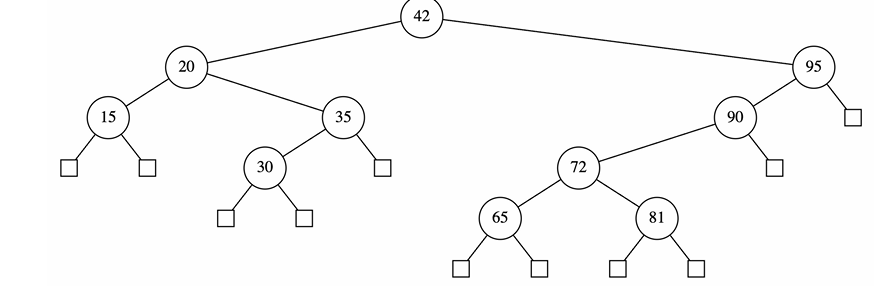


DadounnúmeroenteroxyunABBdellavesenterasconraízr,programeelmétodosucesor(x,r)elcualentregalallavedel
 ABBqueessucesoradex.Esdecir, lamenorllavedelABBqueesestrictamentemayorquex.SixnotienesucesorenelABB,
 elmétododeberetornarNone.

In [ ]:
#vamos a tener que tener ojo puesto que nos piden el valor .der del x
#entonces buscamos a x, si vamos por la izq,
def sucesor(x,r): #entrega sucesora de x, con raiz r
  #entonces hay que primero buscar x, como es abb esta ordenado entonces:
  candidato = None
  p = r #puntero para no cagarla modificando la raiz
  while p is not None: #mientras que p sea distinto de None
    if x<p.info: #si x es menor, revisamos por la izq
      candidato = p.info #candidato toma ese valor
      p = p.izq #y se avanza
    else:
      p = p.der#sino se revisa la derecha
  return candidato




Considere un árbol binario con llaves enteras almacenadas en sus nodos. Se desea saber si todas las llaves cumplen la re
lación de orden de un “max-heap”, esto es, que la llave del padre sea mayor que las llaves de sus hijos, para todos los nodos del
 árbol.
 Programe en Python una función cumple_heap(r) que retorne True si el árbol de raíz r cumple las relaciones de orden
 padre-hijo indicada, y False si no. Su función debe correr en tiempo O(n) donde n es el número de nodos del árbol.

In [ ]:
#que la llave padre sea mayor significa verificar que la llave sea mayor que sus hijes, heap solo importa
#el valor, no la relacion de el menor izq... bla bla
def cumple_heap(r):
  if r is None:#si es None
    return True #no tiene llaves, claramente es mayor
  if (r.izq is not None and r.izq.info>r.info) /
  or (r.der is not None and r.der.info>r.info) #ya sea la izq o la derecha son mayores
  or not cunple_heap(r.izq) #llamamos recursivo izq
  or not cumple_heap(r.der) #llamamos recursivo der
    return False
  return True


2. Se dice que un método de ordenación es establesicuandoenelarreglodeentradahayllaves iguales,enlasalidarespeta
 elordenoriginalquehabíaentreellas.Paracadaunodelosmétodossiguientedigasiesestableono:


 a) [1punto] Inserción: SI


 b) [1punto]Heapsort: NO


 c) [1punto]Mergesort: SI

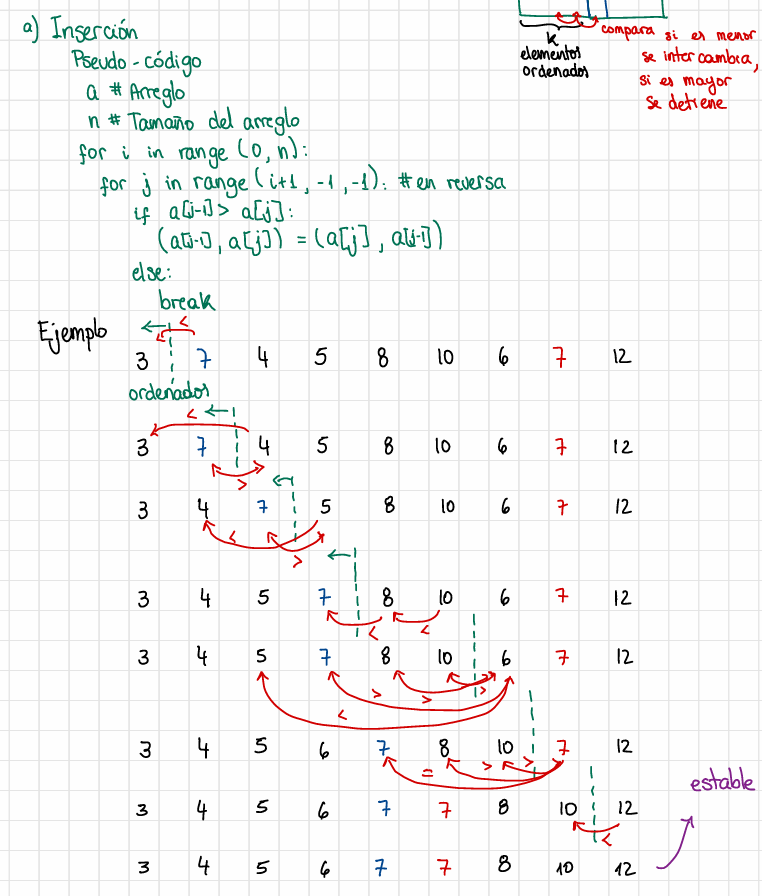

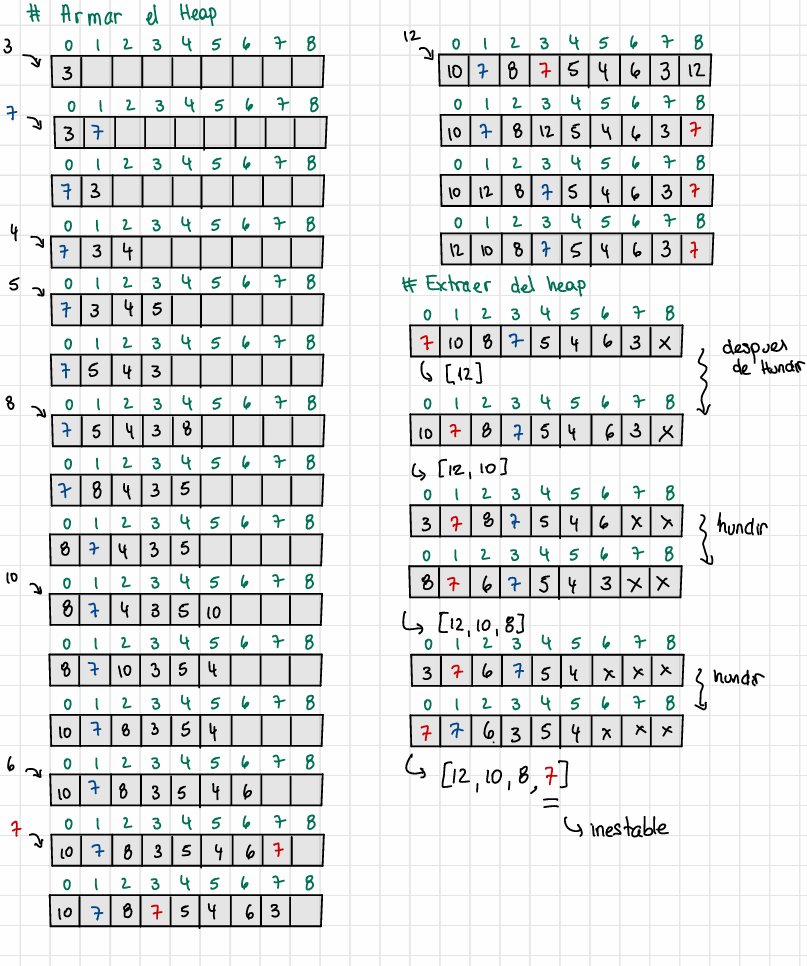

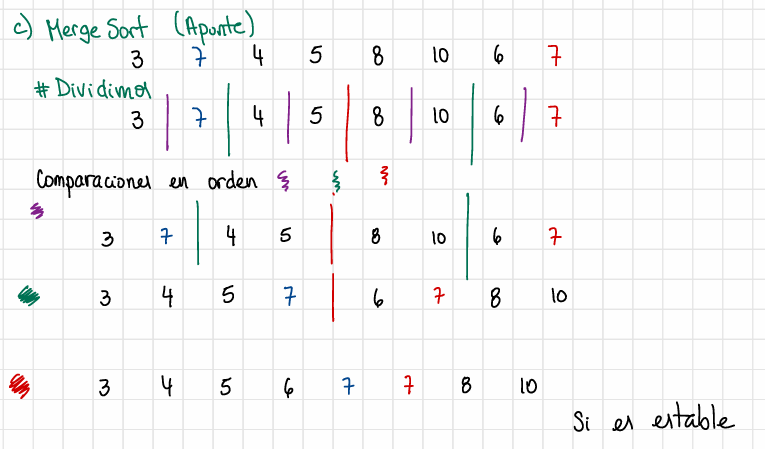

P3 2017-1 [´ Arboles]
 El algoritmo usual de inserci´on en un ´arbol de b´ usqueda binaria (ABB) deja al nuevo
 elemento en el borde inferior del ´arbol. En este problema vamos a programar un
 algoritmo alternativo que deja al nuevo elemento como ra´ ız del ´arbol resultante. Para
 esto, se compara el nuevo elemento con la ra´ ız del ´arbol y, dependiendo de si es menor
 o mayor que ella, se inserta (recursivamente) en el sub´arbol izquierdo o derecho,
 respectivamente. Observando que despu´ es de esto el nuevo elemento debe estar como
 hijo directo de la ra´ ız, se hace una rotaci´on simple para dejarlo como ra´ ız.
 Escriba una funci´on en pseudoc´odigo de encabezado insertar_raiz(x, root) que
 inserte un nuevo elemento x en un ´arbol cuya ra´ ız es root, y que retorne la ra´ ız del
 ´arbol resultante. Suponga que la llave x es distinta de todas las que est´an en el ´arbol.

In [ ]:
#debemos comparar el elemento con la raiz, luego insertar recursivamente
#luego hay que dejarlo como raiz, mediante ROTACIONES
#para ello tenemos los siguientes pasos:
#Si el árbol está vacío, se crea un nuevo nodo y se retorna como raíz.
#Si x < root.key, se inserta recursivamente en el subárbol izquierdo, y luego se hace una rotación simple a la derecha.
#Si x > root.key, se inserta recursivamente en el subárbol derecho, y luego se hace una rotación simple a la izquierda.

def insertar_raiz(x, root):
  if root is None: #arbol vacio, Caso Base
    return nuevo_nodo(x) #creamos el nuevo nodo de x
  elif x < root.key: #si x es menor
    root.left = insertar_raiz(x, root.left) #llamada recursiva con ROOT.LEFT, pues estamos viendo a la izquierda
    #ojo la rotacion no es entre la parte derecha del arbol y la izq, es entre los nodos hijos y padres
    #queremos que trepe
    return rotar_derecha(root) #luego rotamos a la derecha a root, pues estamos en izq
  elif x > root.key:
    root.right = insertar_raiz(x, root.right)
    return rotar_izquierda(root)

#Se modifica root.left o root.right porque se quiere que el nuevo subárbol (donde x es raíz) reemplace al anterior.
#Se rota respecto a root porque ese es el nodo cuya posición cambia: baja un nivel y su hijo sube.

#usando:

def rotar_derecha(p):
    q = p.left
    p.left = q.right
    q.right = p
    retornar q

def rotar_izquierda(p):
    q = p.right
    p.right = q.left
    q.left = p
    retornar q

 P2. Ex 2020-1 [AVL]
 El Prof. Frank N. Stein ha propuesto un nuevo algoritmo de ordenamiento utilizando
 un ABB (´arbol de b´usqueda binaria). Dado un arreglo de tama˜ no n, el algoritmo de
 ordenamiento consiste en los siguientes pasos:
 a) Crear un ABB vac´ ıo.
 b) Insertar los n elementos del arreglo en el ABB.
 c) Realizar un recorrido inorden del ´arbol, mostrando en orden los nodos visitados.
 ¿Cu´al es la complejidad en el mejor caso para este algoritmo? ¿Cu´al es la complejidad
 en el peor caso para este algoritmo? Explique brevemente sus respuestas, indicando
 cuanto tiempo toma cada uno de los pasos del algoritmo.
 Un alumno muy perspicaz le propone al Profesor usar un ´arbol AVL en vez del ABB
 en su algoritmo de ordenamiento. ¿Cu´al es la complejidad en el peor caso para este
 nuevo algoritmo? Explique por qu´e. ¿Cu´al es la complejidad de este nuevo algoritmo
 si los elementos del arreglo ya vienen ordenados.
 Explique por qu´e (piense en cu´anto cuesta insertar un nuevo elemento en el ´arbol
 AVL considerando que vienen ordenados, y luego calcule la complejidad total del
 algoritmo).

In [ ]:
Complejidad en el mejor caso (ABB balanceado):
Si el árbol se construye balanceado (por ejemplo, insertando los elementos en orden aleatorio que mantiene el árbol equilibrado):

Cada inserción toma O(log n) → Total para n inserciones: O(n log n)

El recorrido inorden recorre cada nodo una vez → O(n)

Total mejor caso:
O(n log n)
Total peor caso:
O(n²)

Complejidad en el peor caso con AVL:
Cada inserción toma O(log n), ya que el árbol se rebalancea si es necesario.

Para n inserciones: O(n log n)

Recorrido inorden: O(n)
Total mejor caso:
O(n log n)
Total peor caso:
O(n log n)

Es mejor AVL pues mejora el peor caso pues se rebalancea automaticamente despues de cada insercion

 P3 Ex 2020-1 [Trie]
 Dada una matriz binaria de tama˜ no N×M, en esta pregunta abordaremos el problema
 de detectar filas duplicadas. Una forma de resolver este problema es comparar las filas
 en pares hasta encontrar las que sean id´ enticas.La salida de un algoritmo que resuelva este problema deber´ ıa ser el conjunto de pares
 de filas (i,j), tal que la fila i es id´entica a la fila j. En el peor caso, como la cantidad
 de pares que se pueden formar con N filas es N(N−1)
 2
 y la comparaci´on de cada par de
 f
 ilas tomar´ıa M comparaciones de n´ umeros binarios, la complejidad de este algoritmo
 es O(N2 ×M).
 Lo que se le pide es:
 Formule un algoritmo (pseudoc´odigo o descrito en palabras) que utilice un Trie
 para detectar las filas duplicadas de la matriz binaria. Su algoritmo deber´ ıa tener
 complejidad O(N ×M).
 Justifique por qu´e su algoritmo tiene complejidad O(N × M).

In [ ]:
primero:
Un Trie (o árbol de prefijos) es una estructura de datos en forma de árbol, útil para almacenar cadenas (o listas) de símbolos, donde cada camino desde la raíz representa una secuencia.
Para nuestro caso:
Cada fila de la matriz binaria puede verse como una cadena de bits (lista de 0 y 1).
El Trie nos permite insertar y buscar filas de forma eficiente, caracterizando fácilmente si ya existe una fila igual.

#en el promebla nos estan pidiendo encontrar los A[i] == A[j]
#recorremos cada fila y la insertaremos en Trie
#si una fila ya esta en el Trie, entonces esta duplicada
#si no, se guarda

#entonces:
class TrieNode:
    def __init__(self):
        self.children = {}  # Claves: 0 o 1
        self.indices = []   # Lista de filas que terminan en este nodo

def detectar_filas_duplicadas(matriz):
    raiz = TrieNode()
    duplicados = []

    for i, fila in enumerate(matriz):
        nodo = raiz
        for bit in fila:
            if bit not in nodo.children:
                nodo.children[bit] = TrieNode() #creamos nueva clave para el bit
            nodo = nodo.children[bit]

        # Si ya hay alguna fila igual a esta
        for j in nodo.indices:
            duplicados.append((j, i))
        nodo.indices.append(i)

    return duplicados

P4 Quickselect [Sort]
 Al igual que Quicksort, fue desarrollado por Tony Hoare, y por eso tambi´ en se conoce
 como El algoritmo de selecci´on de Hoare. Quickselect se utiliza para entregar el´ ındice
 de alg´ un elemento en un arreglo, ocupando el mismo principio de reducci´on del pro
blema que Quicksort. Esto es, se elige un elemento como pivote, y se particionan los
 datos en dos: si son menores o mayores que el pivote. La diferencia est´a en que, en
 lugar de continuar ordenando ambos lados, solo ordena el lado donde se encontrar´ ıa
 el elemento buscado si estuviera.
 ¿Cu´al es la complejidad de este algoritmo? ¿Cree usted que es un algoritmo eficiente?
 ¿Por qu´ e?

In [ ]:
Mejor caso (pivote divide bien cada vez):
Cada paso descarta la mitad del arreglo → como una búsqueda binaria.

Coste por nivel de partición: O(n)
Profundidad de recursión: O(log n)
✅ Total: O(n)

🔹 Peor caso (pivote divide mal siempre):
Si el pivote es el mayor o el menor → no se descarta casi nada

Coste por nivel: O(n)

Recursión en n-1 elementos cada vez
❌ Total: O(n²)

Quickselect es eficiente para encontrar el k-ésimo menor elemento.

Es mejor que ordenar todo el arreglo si solo necesitas ese elemento.

Aleatorizar el pivote lo hace robusto y rápido en la práctica.

P5. C2 2023-1 [Sort]
 Dado un arreglo a[0],...,a[n − 1] y un entero s(0 ≤ s ≤ n), se debe encontrar los
 s menores elementos del conjunto, dej´andolos ordenados de menor a mayor en los
 primeros s casilleros del arreglo a.
 Para esto, usted debe modificar la funci´on quicksort (y de manera similarqsort) para
 que reciba el par´ametro adicional s, de manera que al ejecutarse quicksort(a,s) se
 obtenga el resultado pedido.
 A continuaci´on se reproducen estas dos funciones del apunte. Asuma que la funci´on
 particion ya est´a implementada (no necesita escribirla usted) y retorna la posici´on
 del pivote:

In [ ]:
#esto es hacer un quicksort parcial ordenando los s menores elementos, buscamos una CANTIDAD S DE ELEMENTOS
#no los que sean menores a s
def quicksort(a, s):
  qsort(a, 0, len(a) - 1, s)

def quicksort_total(a, i, j): #nuestro qsort original, el del enunciado
    if i < j:
        k = particion(a, i, j)
        quicksort_total(a, i, k - 1)
        quicksort_total(a, k + 1, j)

def qsort(a,i,j,s): #debemos añadir s tambien aca
  # Ordena a[i], ..., a[j]
 if i < j: # quedan 2 o m´as elementos por ordenar
  k=particion(a,i,j) #con la particion encontramos nuestro pivote k
  #ahora debemos buscar s, para ello ocupamos recursividad
  num = k - i + 1 #CANTIDAD DE elementos en el lado izq incluyendo a[k]
  #estamos viendo el lado izquierdo, los que son menores, entonces:
  if num == s: #encontramos la cantidad, entonces los ordenamos
    quicksort_total(a, i, k)
  elif num > s:#debemos seguir buscando
    qsort(a,i,k-1,s) #bajamos nuestro j
  else:
    qsort(a,k+1,j, s - num) #subimos nuestro i y
    #S - NUM PUESTO QUE ya tenemos num valores menores o iguales al pivote en a[i..k]
    #Nos faltan exactamente s - num elementos menores, contando desde EL pivote pues los que estan detras de este ya son menores
    #si hicieramos solo s estariamos buscando entre los s elementos de una lista mas corta y no nos da lo mismo
    quicksort_total(a, i, k) #ordenamos los elementos que encontramos, esto modifica la lista asi que se ordena
    #y luego con los mayores tambien se ordenaran



Control 2 Primavera 2024


P1 Dado un arreglo a de tamaño n, y dado un entero k (0 ≤ k ≤ n), se desea reordenar los datos para que los k menores
elementos queden en las k primeras posiciones, ordenados de menor a mayor. Modifique el algoritmo Quicksort para que realice
esta tarea. Sugerencia: Inspírese en Quickselect.

In [ ]:
#Quickselect encuentra el k esimo menor elemento del arreglo, es decir, el k esimo elemento
#del arreglo si es que este se ordenara, a[k]

def quickselect(a,k):
    assert k>=0 and k<len(a)
    qselect(a,k,0,len(a)-1)
    return a[k]


def qselect(a,k,i,j): # selecciona el elemento que quedaría en a[k]
                      # si se ordenara a[i],...,a[j] (i<=k<=j)
    if i<j:
        p=particion(a,i,j)
        if p!=k:
            if k<p:
                qselect(a,k,i,p-1)
            else:
                qselect(a,k,p+1,j)

#en iteracion:
def quickselect(a,k):
    assert k>=0 and k<len(a)
    i=0
    j=len(a)-1
    while i<j:
        p=particion(a,i,j)
        if p==k:
            break
        if k<p:
            j=p-1
        else:
            i=p+1
    return a[k]

#ahora modifiquemos este algoritmo tal que debemos ordenar los k menores
#para ello NECESITAMOS quicksort_total, la funcion que nos ordene el arreglo que le pasamos:
def quicksort_total(a, i, j):
    if i < j:
        p = particion(a, i, j)
        quicksort_total(a, i, p - 1)
        quicksort_total(a, p + 1, j)

def menores_k(a,k,i,j):
  assert 0 <= k <= len(a)
  if k == 0:
    return #na que hacerle
  else:
    # selecciona el elemento que quedaría en a[k] y vemos su particion:
    qselect(a, k - 1, 0, len(a) - 1)      # deja los k menores en las primeras k posiciones (desordenados)
    quicksort_total(a, 0, k - 1)         # ordena los primeros k elementos

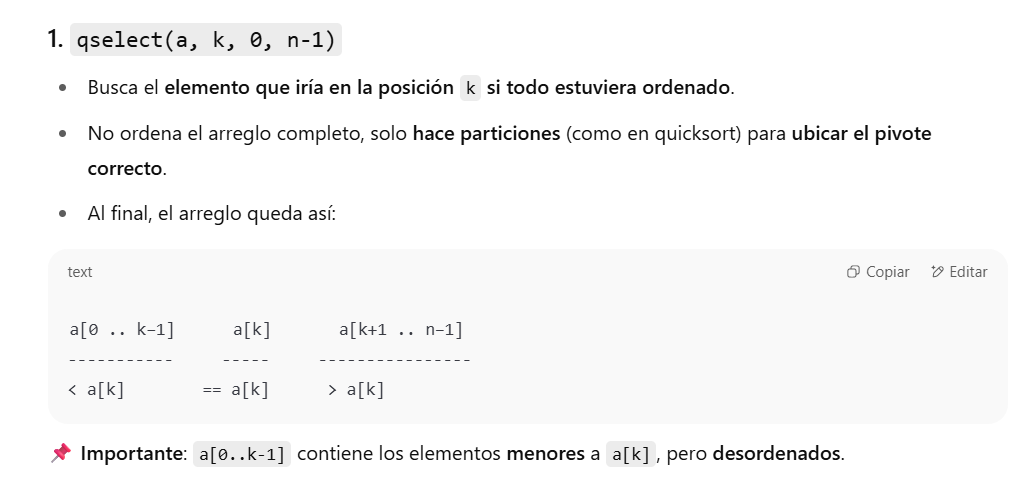

P2 En este problema usted debe programar un método de búsqueda (search) para B-trees. Un B-tree consta de nodos internos (NodoBi) y nodos externos (NodoBe). Un nodo interno contiene un contador nllaves, un arreglo hijos que apunta a los nodos
hijos y un arreglo llaves que contiene las llaves. Los elementos en uso son hijos[0],...,hijos[nllaves] y llaves[1],...,llaves[nllaves].
Note que nllaves es siempre ≥ 1 y que llaves[0] no se usa.
Suponga que existen clases NodoBi y NodoBe, y programe un método buscar(x) dentro de cada una de esas clases. Si x se
encuentra, se debe retornar un puntero al nodo que lo contiene. Si no se encuentra, se debe retornar None.

In [ ]:
La gracia de B tree es que es como un arbol 2-3 con esteroides porque puede tener muchos hijos, y llaves, el limite se basa en tu computador
Un nodo interno (NodoBi) tiene:
nllaves: cuántas llaves tiene
llaves[1..nllaves]: llaves ordenadas, llaves[0] no se usa
hijos[0..nllaves]: subárboles (punteros a otros nodos)

Un nodo hoja (NodoBe) tiene:
También un arreglo llaves[1..nllaves]
Pero no tiene hijos

#el objetivo es buscar en las LLAVES, desde la 1 hasta n
class NodoBe:
  def __init__(self, llaves):
        self.llaves = llaves  # llaves[1..nllaves], llaves[0] no se usa
        self.nllaves = len(llaves) - 1
  def buscar(self,x):
    for i in range(1, self.nllaves + 1): #buscamos en el rango de llaves
      if self.llaves[i] == x: #si la llave es igual a x
        return self #RETORNAMOS EL PUNTERO
    return None #sino, None

class NodoBi:
    def __init__(self, llaves, hijos):
        self.llaves = llaves  # llaves[1..nllaves], llaves[0] no se usa
        self.hijos = hijos    # hijos[0..nllaves]
        self.nllaves = len(llaves) - 1
    def buscar(self,x):
      i = 1
      while i <= self.nllaves and x > self.llaves[i]: #mientras que i sea menor que el conteo de llaves y x mayor al elemento en lista llaves
        i += 1 #avanzamos
      if i <= self.nllaves and x == self.llaves[i]: #si i es menor al conteo de llaves y x es igual a elemento llave
        return self #retornamos el puntero
      return self.hijos[i - 1].buscar(x) #si no, llamada recursiva para los hijos[i-1]

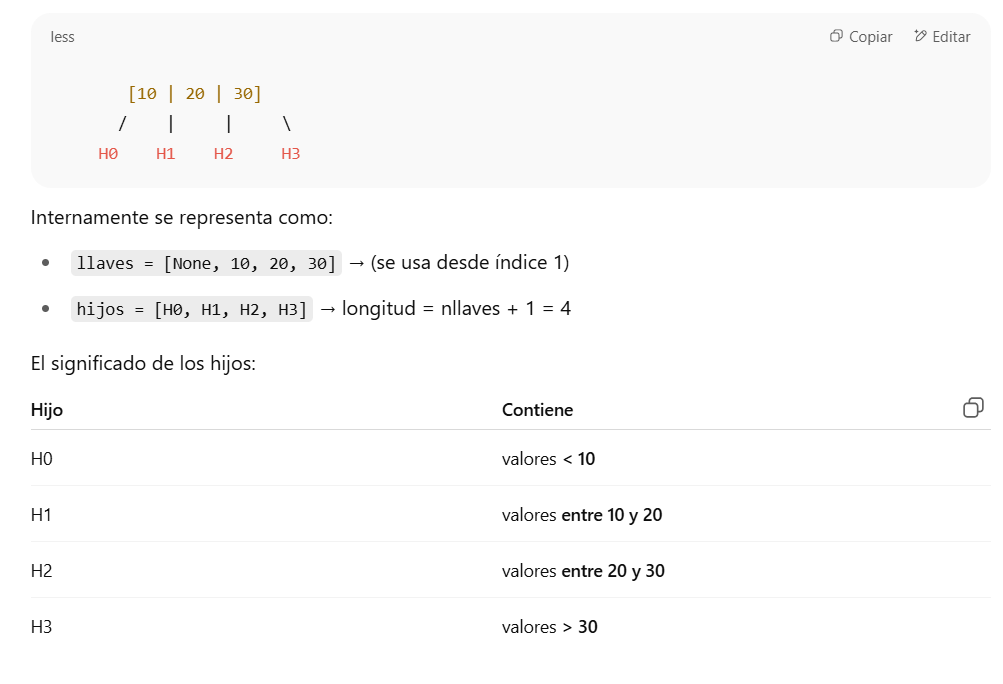

P3 Dado un grafo dirigido G(V, E) y dados un nodo x y un entero no negativo k, usted debe programar una función khops(x,k)
que realice un recorrido en amplitud para encontrar todos los nodos v que están a distancia ≤ k del nodo x. La distancia desde
x a v es el mínimo número de pasos (hops) para llegar desde x hasta v.

In [ ]:
#ahora estamos trabajando con grafos para ello hacemos como en discretas
#este es BFS no recursivo:
def BFSnorecursivo(G, x):
    n = 0
    DFN = {}  # visitado con orden
    for v in G:
        DFN[v] = 0

    cola = deque()
    cola.append(x)

    while cola:
        v = cola.pop()
        if DFN[v] == 0:  # primera vez que lo visitamos
            n += 1
            DFN[v] = n
            for w in G[v]:
                cola.append(w)

    return DFN

def khops(x,k): #x nuestro nodo, k distancia para nodos menores a este
  #nos piden recorrer en amplitud esto es BFS, esto utiliza una cola pues si recordamos
  #nos queda en formato estrella, visitamos los vecinos, luego:
  for v in V: #nodos vecinos
    visitado[v] = False #todos los nodos en False pues aun no los visitamos
    distancia[v] = infinito #con distancia infinito ya que aun no comenzamos

  cola = Cola(x) #creamos cola partiendo de x
  cola.push(x) #empujamos x dentro de la cola
  visitado[x] = True #luego x esta visitado
  distancia[x] = 0 #y su distancia es cero, distancia de x a x

  while not cola.is_empty(): #mientras que no tengamos cola vacia, es decir, tengamos nodos por visitar
        v = cola.pop() #sacamos el nodo mas cercano a explorar
        for w in vecinos[v]: #recorremos todos los vecinos de v
            if not visitado[w] and distancia[v] < k: #si w no ha sido visitado y su distancia es <k
                cola.push(w) #lo metemos en la cola para explorar mas adelante
                visitado[w] = True #marcamos que lo visitamos
                distancia[w] = distancia[v] + 1 #ahora la distancia aumenta, antes estabamos en v y ahora en w que es v + 1




Aux 11 2024

P1. Multiway Merge
Es conocido el algoritmo de merge sort, el cual divide un arreglo en 2 partes iguales, ordena
recursivamente y luego realiza la operaci´on de merge para unir ordenadamente cada subarreglo.
a) Programe una funci´on merge k que dado k arreglos ordenados 
a0, . . . , ak−1 :
Pk−1
i=0 |ai
| = n

,
vaya entregando los elementos del arreglo ordenado resultante. ¿Qu´e orden asint´otico es?
b) El algoritmo simple de k-merge tiene una subtarea no optimizada. Utilizando una estructura de datos adecuada, implemente una mejor versi´on de merge k. ¿Qu´e orden es esta
nueva versi´on?


In [ ]:
#tenemos k arreglos ordenados con sumatoria respectiva = n
def merge_k(k_a): #recibe k arrays
  #ahora hay que ordenar cada uno, para ello tomaremos siempre el menor de la cabecera de lso k arreglos
  k = len(k_a) #k es nuestra cantidad de arrays
  indices = [0] * k #creamos una lista con k ceros, con este sabremos que elementos hemos tomado de arreglo i
  resultado = [] #una lista con el resultado la cual sera insertada segun el indice

  while True: #la mitica
    min_val = None #valor del minimo
    min_pos = -1 #posicion del minimo

    for i in range(k): #iteramos por los k arreglos
      if indices[i] < len(k_a[i]): #si el elemento i de la lista de indices es menor a el largo de los k arrays, es decir, que no hayamos procesado todos los elementos de arreglo i
      #si indices[i] == len(arrays[i]), ya usamos todo ese arreglo, y no lo consideramos más.

        val = k_a[i][indices[i]] #Tomamos el siguiente valor disponible en el arreglo i (el que no hemos usado todavía).

        if min_val is None or val < min_val: #comparamos el valor con el minimo actual que es minval
            min_val = val #si el minval es None es porque aun no tenemos min y actualizamos
            min_pos = i #posicion del minimo

    #ojo estamos fuera del for, deberiamos tener un min val
    if min_val is None:
            break  # Todos los arreglos están agotados

    resultado.append(min_val)
    indices[min_pos] += 1

  return resultado
#esto tiene una complejidad de O(Nk) revisamos cada array n, k veces. si k es grande este algoritmo es ineficiente

#para mejorarlo se puede hacer uso de min heap esto almacena: (valor, índice_arreglo, índice_elemento)
#esto es utilizar hundir en heap !!!!
#normalmente uno puede mejorar los casos con heap siempre que sean del tipo: escoger y luego ordenar, heap hace eso todo de una
 def merge_k(arrays):
    #asumimos que tenemos el heap con los valores...
        heap = []
    resultado = []

    # Construir el heap inicial con el primer elemento de cada arreglo
    for i, arr in enumerate(arrays):
        if arr:
            heap.append((arr[0], i, 0))  # (valor, índice del arreglo, índice dentro del arreglo)

    # Construir el heap usando hundir_min
    n = len(heap)
    for i in range(n//2 - 1, -1, -1):
        hundir_min(heap, i, n)

    while heap:
        # Sacar el menor elemento (raíz del heap)
        menor = heap[0]
        val, arr_idx, pos = menor
        resultado.append(val)

        # Reemplazar raíz con el siguiente valor del mismo arreglo (si existe)
        if pos + 1 < len(arrays[arr_idx]):
            heap[0] = (arrays[arr_idx][pos + 1], arr_idx, pos + 1)
        else:
            heap[0] = heap[-1]
            heap.pop()
            n -= 1
            if n == 0:
                break

        # Restaurar propiedad del heap mínimo
        hundir_min(heap, 0, len(heap))

    return resultado


P2. Implementaci´on de grafos
Implemente una clase Grafo, que tenga los siguientes m´etodos:
a) El inicializador, que reciba dos n´umeros enteros indicando la cantidad de v´ertices del
grafo y el tipo, donde 0 corresponder´a a un grafo simple y 1 a un grafo dirigido. Entre
sus atributos debe guardar la cantidad de v´ertices, el tipo de grafo, los vecinos de cada
v´ertice y la matriz de adyacencia del grafo. La matriz de adyacencia M es una matriz
tal que Mij = 1 si hay una arista desde el v´ertice i al v´ertice j y 0 si no.
b) agregarArista(u,v) que agregue la arista (u, v) al grafo. Nota: si el grafo es simple, la
arista (u, v) es equivalente a la arista (v, u). No as´ı en grafos dirigidos.


In [ ]:
#ahora con grafos:
class Grafo:
  def __init__(self,v,tipo):
    self.v = v
    self.t = tipo

    #ahora los vecinos:
    self.vecinos = [[] for _ in range(num_vertices)]
    # Matriz de adyacencia: matriz num_vertices x num_vertices llena de ceros
    self.matriz = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]

  def agregar_arista(self, u, v):
        """Agrega una arista desde u hasta v"""
        self.vecinos[u].append(v)
        self.matriz[u][v] = 1

        # Si es no dirigido (tipo = 0), agregamos también la arista opuesta
        if self.tipo == 0:
            self.vecinos[v].append(u)
            self.matriz[v][u] = 1

aux 11 2024

P1. Quicksort de Yaroslavskiy
Implemente el algoritmo de ordenaci´on propuesto por Yaroslavskiy. Su diferencia con el Quicksort usual es que utiliza dos pivotes en vez de uno para realizar la partici´on. Compare los
resultados con el Quicksort original. A continuaci´on se muestra el invariante de la partici´on
utilizada. Es importante destacar que se debe cumplir que P1 ≤ P2.


In [ ]:
def quicksort_yaroslavskiy(a, low=0, high=None):
    if high is None:
        high = len(a) - 1
    if low < high:
        # Elegimos dos pivotes y aseguramos P1 <= P2
        if a[low] > a[high]:
            a[low], a[high] = a[high], a[low]
        p1 = a[low]
        p2 = a[high]

        # Inicializamos punteros
        lt = low + 1
        gt = high - 1
        i = lt

        while i <= gt:
            if a[i] < p1:
                a[i], a[lt] = a[lt], a[i]
                lt += 1
                i += 1
            elif a[i] > p2:
                a[i], a[gt] = a[gt], a[i]
                gt -= 1
            else:
                i += 1

        # Colocar los pivotes en su lugar
        a[low], a[lt - 1] = a[lt - 1], a[low]
        a[high], a[gt + 1] = a[gt + 1], a[high]

        # Recursión en las 3 zonas
        quicksort_yaroslavskiy(a, low, lt - 2)
        quicksort_yaroslavskiy(a, lt, gt)
        quicksort_yaroslavskiy(a, gt + 2, high)

aux 13 2023

P3. Orden topol´ogico de un DAG
Dado G = (V, E) un grafo ac´ıclico dirigido (DAG), un orden topol´ogico es una enumeraci´on
de sus v´ertices tal que para cualquier arista (u, v), u aparece antes que v en la enumeraci´on.
a) Utilice la b´usqueda en profundidad para encontrar el orden topol´ogico de un DAG dado.
Programe una funci´on en Python que encuentre un orden topol´ogico para un DAG dado.
b) Considerando el orden topol´ogico de un DAG, encuentre un algoritmo que derrote al de
Dijkstra para encontrar la distancia m´as corta entre un nodo y todos los dem´as.

In [ ]:
#queremos usar DFS para encontrar el orden de un Grafo Aciclico Dirigido
#nos dices que nos dan un Dag, ahora necesitamos crear funcion que lo ordene
def orden_topologico(grafo): #recibe un grafo
  #ahora debemos ordenar este grafo con DFS
  #al hacer dfs en un grafo asi, nos queda: v1 - v2 -...-vn
  #entonces si queremos aristas buscamos que sean de la forma, v1-v2, v2-v3
  visitado = set()
  resultado = []

    def dfs(v):
        visitado.add(v)
        for w in grafo[v]:
            if w not in visitado:
                dfs(w)
        resultado.append(v)  # se agrega post-recorrido

    for v in grafo:
        if v not in visitado:
            dfs(v)

    return resultado[::-1]  # invertir para obtener orden topológico
no recursivo:
def orden_topologico_no_recursivo(grafo):
    visitado = set()
    resultado = []
    pila = []

    for v in grafo:
        if v in visitado:
            continue

        pila.append((v, False))  # (nodo, False) → primera vez que lo vemos

        while pila:
            nodo, procesado = pila.pop()

            if procesado:
                # Ya procesamos todos sus vecinos → postorden
                resultado.append(nodo)
            elif nodo not in visitado:
                visitado.add(nodo)
                pila.append((nodo, True))  # lo agregamos para postprocesamiento

                # agregamos sus vecinos aún no visitados
                for w in reversed(grafo[nodo]):
                    if w not in visitado:
                        pila.append((w, False))

    return resultado[::-1]  # invertir para orden topológico



aux 8 2023

P1. Heap ternario
Como se estudi´o en clases de c´atedra, un heap representa un ´arbol binario con sus nodos
completando los niveles desde la izquierda. Sin embargo, existe una versi´on mas generalizada
de esta estructura llamada heap d-ario, el cual representa un ´arbol con forma de heap donde
cada nodo puede tener d hijos.
Nuestro objetivo ahora ser´a realizar la implementaci´on de un heap ternario, es decir, un heap
d-ario, donde d es igual a 3, para ellos haremos lo siguiente:
a) Obtenga las nuevas expresiones para los hijos de un nodo j y el padre de un nodo k
b) Modifique el c´odigo del apunte de heap para implementar un heap ternario

## **SECCION DIBUJO**

arboles AVL:
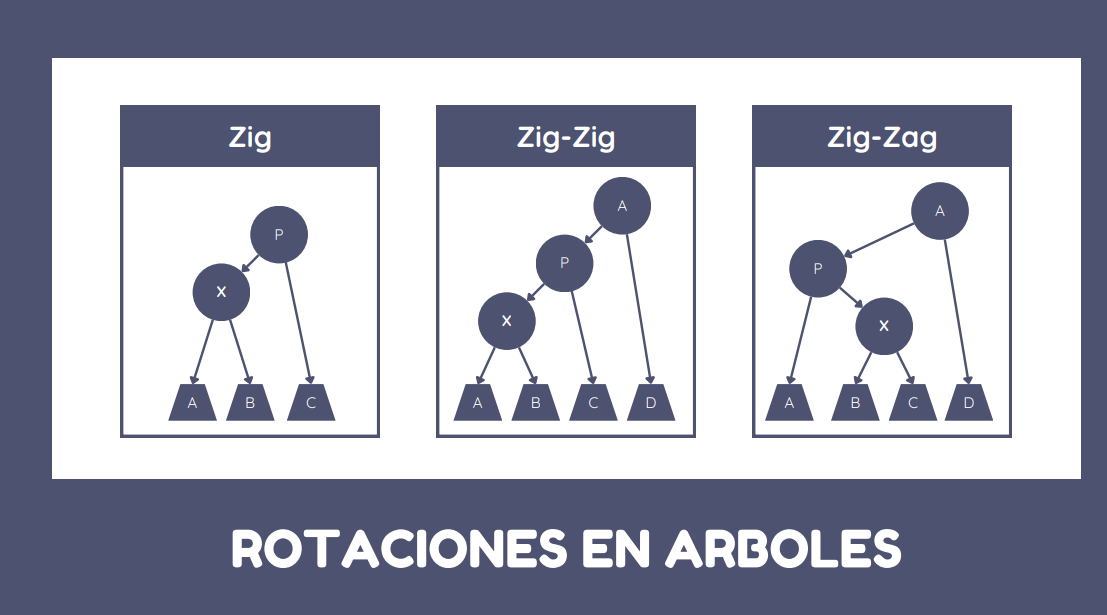
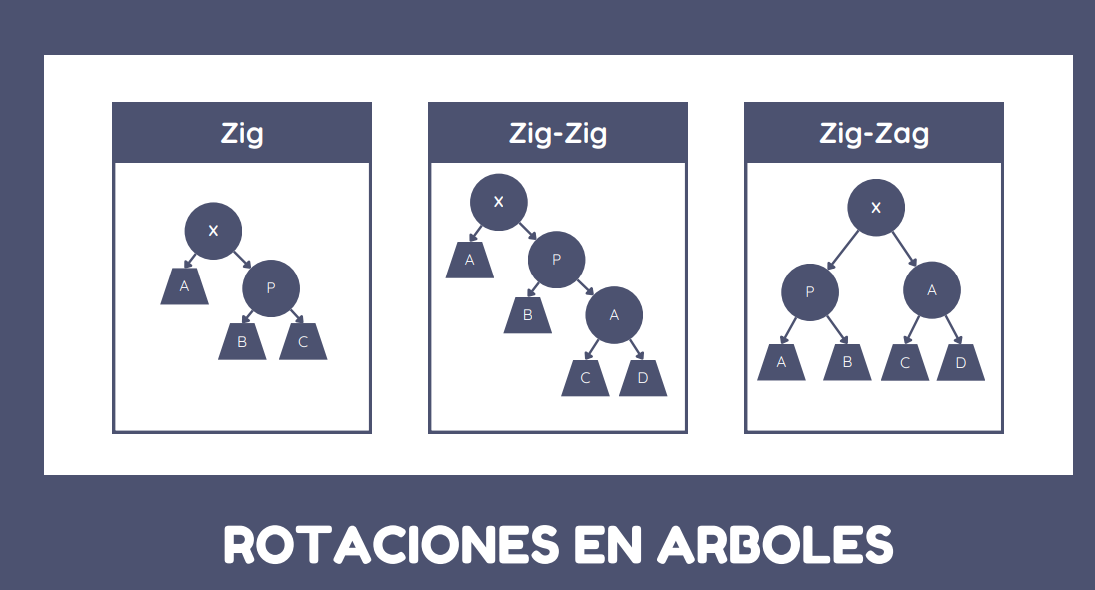

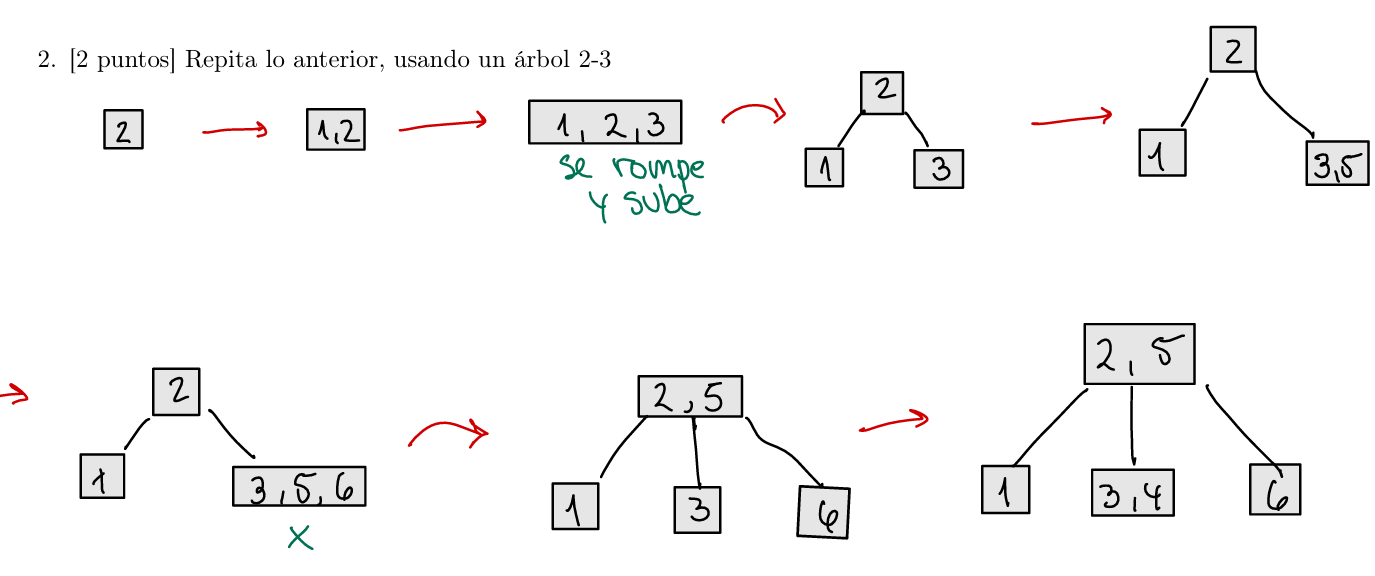

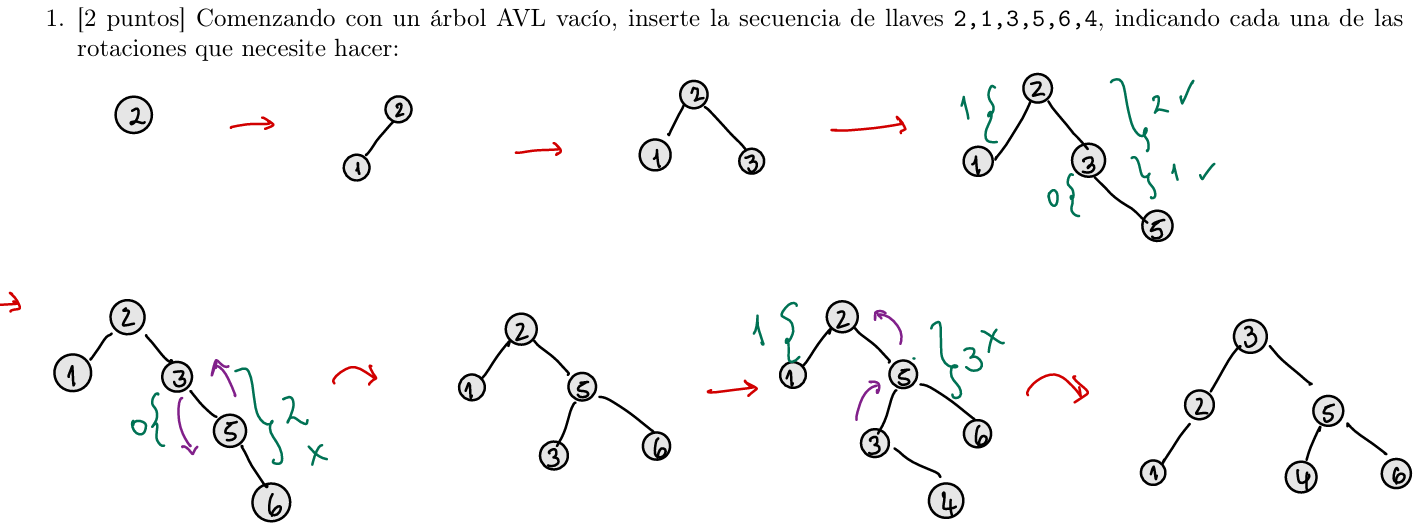

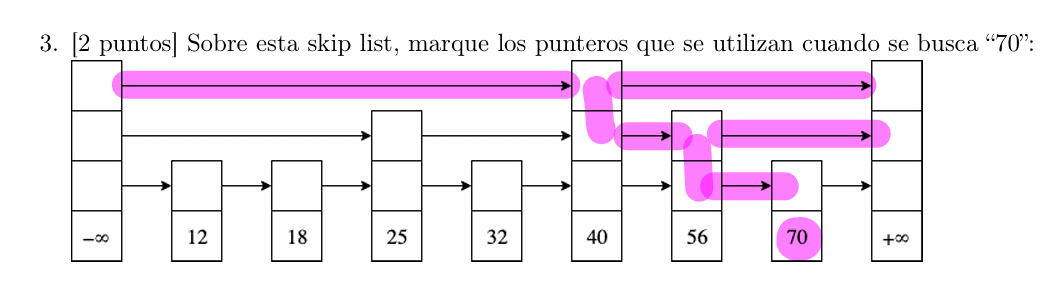

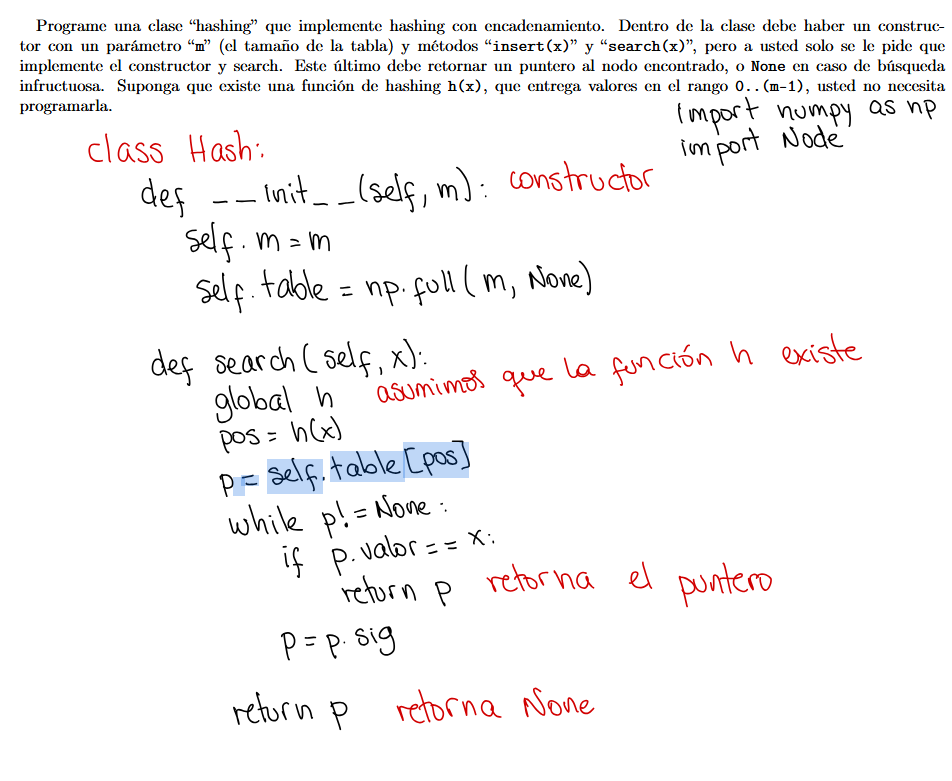

In [ ]:
import numpy as np

class HashTable:
    def __init__(self, m):
        self.m = m
        self.table = np.full(m, None)

    def hash_function(self, key):
        return hash(key) % self.m

    def insert(self, key, value):
        index = self.hash_function(key)
        start_index = index  # Para evitar bucles infinitos

        while self.table[index] is not None:
            k, v = self.table[index]
            if k == key:
                # Actualizar el valor si la clave ya existe
                self.table[index] = (key, value)
                return
            index = (index + 1) % self.m
            if index == start_index:
                raise Exception("Hash table is full")

        self.table[index] = (key, value)
